In [35]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [36]:
img = cv.imread('/content/sample_data/periodic_noise.JPG', cv.IMREAD_GRAYSCALE)

In [37]:
# 1. Высокочастотная фильтрация Гаусса
def gaussian_high_pass_filter(image, sigma=30):
    dft = cv.dft(np.float32(image), flags=cv.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2

    x = np.arange(0, cols, 1)
    y = np.arange(0, rows, 1)
    X, Y = np.meshgrid(x, y)
    gaussian_low_pass = np.exp(-((X - ccol)**2 + (Y - crow)**2) / (2 * sigma**2))


    gaussian_high_pass = 1 - gaussian_low_pass

    dft_shift_filtered = dft_shift * gaussian_high_pass[:, :, np.newaxis]

    f_ishift = np.fft.ifftshift(dft_shift_filtered)
    img_back = cv.idft(f_ishift)
    img_back = cv.magnitude(img_back[:,:,0], img_back[:,:,1])

    return img_back, gaussian_high_pass

In [38]:
# 2. Удаление периодического шума
def remove_periodic_noise(image):
    dft = cv.dft(np.float32(image), flags=cv.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    magnitude_spectrum = 20 * np.log(cv.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]) + 1)

    rows, cols = image.shape
    mask = np.ones((rows, cols, 2), np.uint8)

    centerX, centerY = rows // 2, cols // 2

    noise_radius = 45
    cv.circle(mask, (centerY, centerX), noise_radius, (0, 0), thickness=3)

    dft_shift_filtered = dft_shift * mask

    f_ishift = np.fft.ifftshift(dft_shift_filtered)
    img_back = cv.idft(f_ishift)
    img_back = cv.magnitude(img_back[:,:,0], img_back[:,:,1])

    return img_back, mask[:,:,0], magnitude_spectrum

In [39]:
print("1. ВЫСОКОЧАСТОТНАЯ ФИЛЬТРАЦИЯ ГАУССА")
img_highpass, gaussian_mask = gaussian_high_pass_filter(img)

print("2. УДАЛЕНИЕ ПЕРИОДИЧЕСКОГО ШУМА")
img_denoised, noise_mask, magnitude_spec = remove_periodic_noise(img)


1. ВЫСОКОЧАСТОТНАЯ ФИЛЬТРАЦИЯ ГАУССА
2. УДАЛЕНИЕ ПЕРИОДИЧЕСКОГО ШУМА


(np.float64(-0.5), np.float64(786.5), np.float64(593.5), np.float64(-0.5))

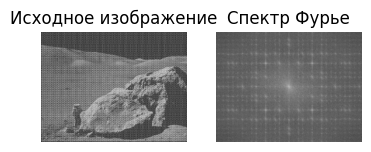

In [40]:
plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(magnitude_spec, cmap='gray')
plt.title('Спектр Фурье')
plt.axis('off')

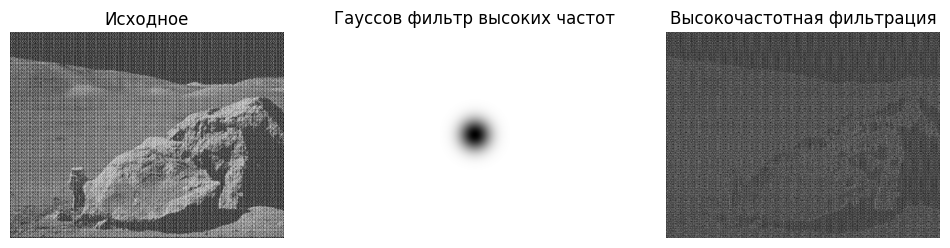

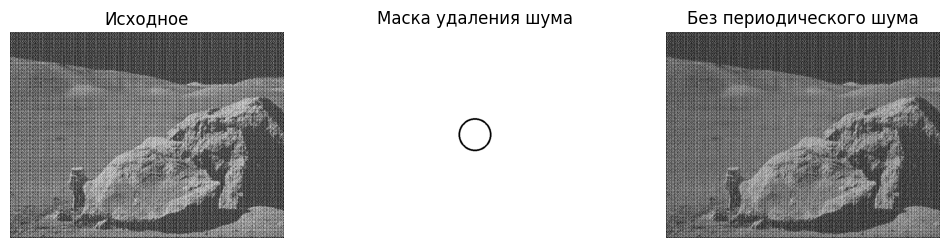

In [46]:

# Только высокочастотная фильтрация
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Исходное')
plt.axis('off')

plt.subplot(132)
plt.imshow(gaussian_mask, cmap='gray')
plt.title('Гауссов фильтр высоких частот')
plt.axis('off')

plt.subplot(133)
plt.imshow(img_highpass, cmap='gray')
plt.title('Высокочастотная фильтрация')
plt.axis('off')
plt.show()

# Только удаление шума
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Исходное')
plt.axis('off')

plt.subplot(132)
plt.imshow(noise_mask, cmap='gray')
plt.title('Маска удаления шума')
plt.axis('off')

plt.subplot(133)
plt.imshow(img_denoised, cmap='gray')
plt.title('Без периодического шума')
plt.axis('off')
plt.show()